# DSCI 632 Final

**Submitter: Nick Hanson**

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

### 1. Instal spark dependencies.
### 2. Set the os.environment variables.
### 3. Create a Spark Session for this notebook. ###

In [1]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# Install findspark
!python -m pip install -q findspark
!python -m pip install -q kaggle

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import *

APP_NAME = "Final Project March Madness"

spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

spark

### 1. Kaggle API Credentials are hard-coded to assist in providing a contained project/notebook for consumers.
### 2. Use the Kaggle API with embedded credentials to create a .zip file storing all of the available .csvs from the March Madness Dataset
### 3. Unzip the file, load each .csv into a pandas dataframe, convert to a spark sql dataframe and store the result in a dictionary (key, value) = (filename, spark sql dataframe)
### 4. Print the filename, show 5 rows from the spark sql dataframe, and print the schema for the dataframe.

In [2]:
import pandas as pd
import zipfile

# Hard-coding kaggle API credentials to assist in containing this project/notebook
os.environ['KAGGLE_USERNAME'] = 'nickhanson21'
os.environ['KAGGLE_KEY'] = '0264e12171ae60ea9f8461b840b2d045'

import kaggle

# Download the dataset as a zip file
kaggle.api.dataset_download_files('nishaanamin/march-madness-data', path='./', unzip=False, quiet=False)

# Define the path to the zip file
zip_file_path = './march-madness-data.zip'

# Create a dictionary to store the dataframes
dataframes = {}

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    csv_files = [f for f in z.namelist() if f.endswith('.csv')]

    for csv_file in csv_files:
        df = pd.read_csv(z.open(csv_file))
        spark_df = spark.createDataFrame(df)
        # Store the DataFrame in the dictionary, using the file name as the key
        dataframes[csv_file] = spark_df

# Print the file name and show 5 rows from each .csv file
for item in dataframes:
    print(item)
    dataframes[item].show(5)
    print(dataframes[item].printSchema())


march-madness-data.zip: Skipping, found more recently modified local copy (use --force to force download)
538 Ratings.csv
+----+-------+-------+----+-----+------------+-----------------+
|YEAR|TEAM NO|   TEAM|SEED|ROUND|POWER RATING|POWER RATING RANK|
+----+-------+-------+----+-----+------------+-----------------+
|2023|    993|Houston|   1|   16|        93.2|               13|
|2023|   1011|Alabama|   1|   16|        92.6|               16|
|2023|    986| Kansas|   1|   32|        89.6|               49|
|2023|    963| Purdue|   1|   64|        89.5|               50|
|2023|    957|  Texas|   2|    8|        90.1|               43|
+----+-------+-------+----+-----+------------+-----------------+
only showing top 5 rows

root
 |-- YEAR: long (nullable = true)
 |-- TEAM NO: long (nullable = true)
 |-- TEAM: string (nullable = true)
 |-- SEED: long (nullable = true)
 |-- ROUND: long (nullable = true)
 |-- POWER RATING: double (nullable = true)
 |-- POWER RATING RANK: long (nullable = tr

### 1. Store the chosen spark sql dataframes from the dataframes dictionary as individual dataframes.
### 2. Filter out any data that might have been added for 2024 already and drop select duplicative columns from each dataframe.
### 3. Rename the TEAM NO columns to reduce ambiguity when joining the datasets into a single dataframe
### 4. Show 5 rows from each dataframe

In [3]:
# Read the resume.csv and shootingsplits.csv file into a sparksql dataframe with inferSchema set to true
resume = dataframes['Resumes.csv']
tourn_idx = dataframes['Heat Check Tournament Index.csv']
kpb = dataframes['KenPom Barttorvik.csv']
mups = dataframes['Tournament Matchups.csv']

# Remove any data associated with 2024 since this tournament has not occurred yet
resume = resume.filter(resume.YEAR != 2024)
tourn_idx = tourn_idx.filter(tourn_idx.YEAR != 2024)
kpb = kpb.filter(kpb.YEAR != 2024)
mups = mups.filter(mups.YEAR != 2024)

# Remove select duplicative columns across dataframes
resume = resume.drop('YEAR', 'TEAM', 'SEED', 'ROUND')
tourn_idx = tourn_idx.drop('YEAR','TEAM', 'SEED', 'ROUND')
kpb = kpb.drop('YEAR', 'CONF', 'TEAM ID', 'TEAM', 'SEED', 'ROUND', 'WINS')

# Rename the TEAM NO columns to reduce ambiguity when joining the datasets
resume = resume.withColumnRenamed('TEAM NO', 'RES TEAM NO')
tourn_idx = tourn_idx.withColumnRenamed('TEAM NO', 'TI TEAM NO')
kpb = kpb.withColumnRenamed('TEAM NO', 'KPB TEAM NO')

# Show the spark sql dataframes
resume.show(5)
tourn_idx.show(5)
kpb.show(5)
mups.show(5)

+-----------+-------+------+--------+---+-------+----+----+------------+-------+--------+-------+--------+
|RES TEAM NO|NET RPI|RESUME|WAB RANK|ELO|B POWER|Q1 W|Q2 W|Q1 PLUS Q2 W|Q3 Q4 L|PLUS 500|R SCORE|BID TYPE|
+-----------+-------+------+--------+---+-------+----+----+------------+-------+--------+-------+--------+
|       1011|      2|     3|       1|  1|    2.7|  13|   6|          19|      0|      24|   99.9|    Auto|
|       1010|     10|     7|       7| 10|    9.3|   9|   7|          16|      0|      22|   99.8|    Auto|
|       1009|     66|    32|      39| 60|   70.0|   5|   4|           9|      1|      10|   43.9|At-Large|
|       1008|     21|    37|      48| 61|   18.7|   4|   4|           8|      1|       7|   88.1|At-Large|
|       1007|     32|    49|      42| 59|   27.3|   3|   6|           9|      1|       8|   84.9|At-Large|
+-----------+-------+------+--------+---+-------+----+----+------------+-------+--------+-------+--------+
only showing top 5 rows

+----------+

### Displaying the range of values for the POWER column in the tourn_idx dataframe by calculating the min and max values for the POWER column.###

In [4]:
# Identify the min and max values of the POWER column in the tourn_idx dataframe
power_range = tourn_idx.agg(min("POWER").alias("Min Value"), max("POWER").alias("Max Value"))

# Show the range of values of the POWER column in the tourn_idx dataframe
power_range.show()

+---------+---------+
|Min Value|Max Value|
+---------+---------+
|     42.5|     95.1|
+---------+---------+



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

###1. Partition the mups dataframe such that every 2 rows is considered a pair, which is an individual/unique matchup.
###2. Within each matchup determine which team won, and store the seed of that team in the RESULT column.
###3. Join all of the dataframes into a single dataframe named combo on TEAM NO.
###4. Clean up data issues regarding Win, Loss, and Total Game values, identify the max value across these 3 columns, store as Total Games, and determine the Total Wins and Total Losses using the WIN% and subtraction which are stored as new columns.
###5. Drop the original columns and show 5 rows from the updated dataframe.


In [5]:
from pyspark.sql.window import Window

# Define the window specification to order rows in descending order
windowSpec = Window.orderBy(col("BY ROUND NO").desc())

# Add a row number to each row
mups = mups.withColumn("rowNum", row_number().over(windowSpec))
mups = mups.withColumn("pairID", expr("floor((rowNum - 1) / 2)"))

# Define a window partitioned by pairID and ordered by 'BY ROUND NO' in descending order
pairWindow = Window.partitionBy("pairID")

# Find the maximum score within each pairID
mups = mups.withColumn("maxScoreInPair", max("SCORE").over(pairWindow))

# Assign 1 to the winning team's row and 0 to the losing team's row
mups = mups.withColumn("RESULT", when(col("SCORE") == col("maxScoreInPair"), col("SEED")).otherwise(0))

# Drop Unneeded Columns
mups = mups.drop("maxScoreInPair", "rowNum")

# Join the select dataframes, resume, shootsplit, tourn_idx, and kpb to the matchups dataframe
combo = mups.join(resume, mups['TEAM NO'] == resume['RES TEAM NO'])
combo = combo.drop('RES TEAM NO')
combo = combo.join(tourn_idx, combo['TEAM NO'] == tourn_idx['TI TEAM NO'])
combo = combo.drop('TI TEAM NO')
combo = combo.join(kpb, combo['TEAM NO'] == kpb['KPB TEAM NO'])
combo = combo.drop('KPB TEAM NO')
combo = combo.withColumnRenamed('TEAM NO', 'TEAM NO')

# Clean up data issues between the W, L, and GAMES columns, by establishing the total number of games as the max value across
# the three columns
combo = combo.withColumn("TOTAL GAMES", greatest("W", "L", "GAMES"))
combo = combo.drop("W", "L", "GAMES")
combo = combo.withColumn("TOTAL WINS", round(col("TOTAL GAMES") * (col("WIN%")/100)).cast("integer"))
combo = combo.withColumn("TOTAL LOSSES", col("TOTAL GAMES") - col("TOTAL WINS"))

# To show the result
combo.show(5)

+----+----------+-----------+-------+----------+----+-----+-------------+-----+------+------+-------+------+--------+---+-------+----+----+------------+-------+--------+-------+--------+-----+----+-----+----+----------+-----------+-----------+-----------+----------+-------+-------+-------+-------+------------+-------+-----------+-------+-------+-------+-----------+-------+-------+-------+-----------+-------+------------+-------+------+------+-------+-----------+----+-----+----+----+----+-----+-----+-----+--------+--------+-----+----+-----+----+-----+----+------+----+-------+----+----+-----+-----+------+-------+-------+-----+------+----+------+-----+-----+---------+----+------------+-----------+-----------+------------+---------+----------+--------+---------+---------+----------+----------+----------+-------------+-------------+----------+---------+----------+---------+----------+---------+-----------+---------+------------+---------+---------+----------+----------+----------+----------

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

### 1. Attempts to engineer additional features of increased relevance/correlation to predicting which team will win in a given matchup.
### 2. The only feature of significant correlation to OUTCOME using a Pearson coefficient was ODE Diff Ratio

In [6]:
#Talent and Experience Product
combo = combo.withColumn('Tal x Exp', (combo['TALENT']) * (combo['EXP']))

# Ratio of Offensive to Defensive Efficiency
combo = combo.withColumn('ODE Diff Ratio', combo['BADJ O']/combo['BADJ D'])

# Ratio of Offensive to Defensive Points Per Posession
combo = combo.withColumn('OD PPP', (combo['PPPO']) / (combo['PPPD']))

# OD Efficiency * OD Points Per Posession
combo = combo.withColumn('ODE Diff x PPP', (combo['ODE Diff Ratio'] * combo['OD PPP']))

# Quality Wins vs. Poor Losses
combo = combo.withColumn('QW vs PL', (combo['Q1 W']*6) + (combo['Q2 W']*.4) - (combo['Q3 Q4 L']))

# Elite Team's Expected Loss Comparison to Reality
combo = combo.withColumn('Elite Loss Comp', ((combo['ELITE SOS']/100) * combo['TOTAL GAMES']) - combo['TOTAL LOSSES'])

# Ratio of the Path Difficulty to the Team's Seed Assignment
combo = combo.withColumn('Seed Path', (combo['PATH']/combo['SEED']))

# Show 5 example rows of the engineered features from the dataframe
combo.select('QW vs PL', 'ODE Diff x PPP', 'Tal x Exp', 'Elite Loss Comp', 'Seed Path').show(5)

+--------+------------------+------------------+-------------------+-----------------+
|QW vs PL|    ODE Diff x PPP|         Tal x Exp|    Elite Loss Comp|        Seed Path|
+--------+------------------+------------------+-------------------+-----------------+
|    18.2|1.2529354721874966|         114.59259|-1.5456000000000003|6.790909090909091|
|    56.8|1.4504067855288212|145.62543599999998|            4.05448|            32.65|
|     0.0|1.1246626015262682|          2.218645|           -5.15823|4.973333333333333|
|    63.2|1.5573765606841683|         99.538309|  5.351040000000001|             67.1|
|    63.2|1.5573765606841683|         99.538309|  5.351040000000001|             67.1|
+--------+------------------+------------------+-------------------+-----------------+
only showing top 5 rows



###1. Split the mups dataframe to separate high and low seed matchups in to the high and low dataframes
###2. Prefix the columns in the high and low dataframes with H and L respectively
###3. Join the data into recom, on pairID, where each row is representative of an individual matchup
###4. Create the Matchup Type and OUTCOME variables and show 5 rows from the recom dataframe

In [7]:
# Split the combo dataframe into high and low based by ROUND NO
high = combo.filter((combo['BY ROUND NO'] %2) == 0)
low = combo.filter((combo['BY ROUND NO'] %2) != 0)

# Prefix the columns in both high and low with an H or L respectively
for col_name in combo.columns:
    high = high.withColumnRenamed(col_name, "H " + col_name)
    low = low.withColumnRenamed(col_name, "L " + col_name)

# Join the low dataframe to the high dataframe on their pairIDs and store this output in the recom dataframe
recom = high.join(low, high['H pairID'] == low['L pairID'])
recom = recom.orderBy(high['H pairID'].asc())

# Create the Matchup Type variable which is a concatenation of the seeds in a given matchup separated by a space
recom = recom.withColumn("Matchup Type", concat(col("H SEED").cast("string"), lit(" "), col("L SEED").cast("string")))

# Create the OUTCOME target variable with two cases, 1 = High Seed Won, 2 = Upset/Low Seed Won
recom = recom.withColumn("OUTCOME", when(col("H RESULT") == col("H SEED"), 1).when(col("L RESULT") == col("L SEED"), 2).otherwise(0))

# Drop H RESULT AND L RESULT following the creation of OUTCOME
recom = recom.drop("H RESULT", "L RESULT")

# Show 5 rows from the new dataframe
recom.show(5)

+------+------------+-------------+---------+-------------+------+-------+---------------+-------+--------+---------+--------+----------+-----+---------+------+------+--------------+---------+----------+---------+----------+-------+------+------+------+------------+-------------+-------------+-------------+------------+---------+---------+---------+---------+--------------+--------+-------------+-------+---------+--------+-------------+-------+---------+--------+-------------+---------+--------------+---------+--------+--------+---------+-----------+------+-------+-----+------+------+-------+-------+-------+----------+----------+-------+------+-------+------+-------+------+--------+------+---------+------+------+-------+-------+--------+---------+---------+-----+--------+-----+--------+------+------+-----------+-----+--------------+-------------+-------------+--------------+-----------+------------+----------+-----------+-----------+------------+------------+------------+--------------

### 1. Create a string indexer, vector assembler, and identify relevant columns for Pearson correletation coefficient calculations.
### 2. Using pipeline, apply the indexer and assembler before calculating the Pearson correlations
### 3. Print the top and bottom 6 correlations for potential use/consideration in the models to be trained

In [12]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col

# Index the "Matchup Type" column
string_indexer = StringIndexer(inputCol="Matchup Type", outputCol="Matchup Type Indexed")

# List of feature columns to exclude "Matchup Type"
remove = ['YEAR', 'TEAM NO', 'TEAM', 'RESULT', 'H SCORE', 'L SCORE', 'H ROUND', 'L ROUND', 'H BID TYPE', 'L BID TYPE', 'H TEAM', 'L TEAM', 'Matchup Type']
feature_columns = [col for col in recom.columns if col not in remove]

# Assemble the vector containing all the features
vector_assembler = VectorAssembler(inputCols=feature_columns + ["Matchup Type Indexed", 'OUTCOME'], outputCol="features")

# Define a pipeline that includes both steps
pipeline = Pipeline(stages=[string_indexer, vector_assembler])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(recom)

# Transform the data
df_transformed = pipeline_model.transform(recom)

# Compute the Pearson correlation matrix for all features including the target
correlation_matrix = Correlation.corr(df_transformed, "features").head()

# Extract the correlation values
correlation_values = correlation_matrix[0].toArray()
target_correlations = correlation_values[:,-1]

# Include Matchup Type in the feature list for correlation mapping
feature_columns.append("Matchup Type Indexed")

# Map feature names to their correlation with the target feature
feature_correlations = dict(zip(feature_columns, target_correlations[:-1]))

# Sort the feature_correlations dictionary by its values
sorted_correlations = sorted(feature_correlations.items(), key=lambda item: item[1])

# Print the first 6 values
print("First 6 correlations:")
for feature, correlation in sorted_correlations[:6]:
    print(f"Correlation of {feature} with OUTCOME: {correlation}")

print("\nLast 6 correlations:")

# Print the last 6 values
for feature, correlation in sorted_correlations[-6:]:
    print(f"Correlation of {feature} with OUTCOME: {correlation}")

First 6 correlations:
Correlation of H WINS with OUTCOME: -0.48242530999613037
Correlation of L POOL S-RANK with OUTCOME: -0.3770253821008935
Correlation of L PATH with OUTCOME: -0.35814764128256554
Correlation of L BARTHAG RANK with OUTCOME: -0.3546580687919525
Correlation of L BADJ EM RANK with OUTCOME: -0.3516886150324866
Correlation of L NCAA S-RANK with OUTCOME: -0.34665853749163905

Last 6 correlations:
Correlation of L KADJ EM with OUTCOME: 0.37861182134617116
Correlation of L POWER-PATH with OUTCOME: 0.38421445461741227
Correlation of L BADJ EM with OUTCOME: 0.3848376110248991
Correlation of L ODE Diff Ratio with OUTCOME: 0.3895488428421796
Correlation of L WINS with OUTCOME: 0.6078146781674449
Correlation of OUTCOME with OUTCOME: 1.0000000000000002


### 1. Create a string indexer, vector assembler, and apply MinMaxScaler to the select columns identified for use in training the subsequent models for predicting OUTCOME.
### 2. Using pipeline, apply the indexer, scaler, and assembler before splitting the data into train and test datasets.
### 3. Split Train and Test using 80 and 20% respectively.

In [13]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler
from pyspark.ml import Pipeline

#Categorical columns to be indexed
categoricalCols = []

# Numerical columns to be scaled
numericCols = ['H WINS', 'L POOL S-RANK', 'L WINS','L ODE Diff Ratio']

# Indexers for categorical columns
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)) for c in categoricalCols]

# Assembler for numeric features (before scaling)
numericAssembler = VectorAssembler(inputCols=numericCols, outputCol="numericVec")

# Scaler for numeric features
scaler = MinMaxScaler(inputCol="numericVec", outputCol="scaled_features")

# Assembler for all features (combining scaled numeric features and indexed categorical features)
assemblerInputs = [c + "_indexed" for c in categoricalCols] + ["scaled_features"]
featureAssembler = VectorAssembler(inputCols=assemblerInputs, outputCol="assembled_features")

# Correctly specify the stages in the pipeline
pipeline = Pipeline(stages=indexers + [numericAssembler, scaler, featureAssembler])

# Fit and Transform
recom_transformed = pipeline.fit(recom).transform(recom)
recom_transformed.select("assembled_features").show(5)

# Split the data
(trainData, testData) = recom_transformed.randomSplit([0.8, 0.2])

+--------------------+
|  assembled_features|
+--------------------+
|[0.33333333333333...|
|[0.16666666666666...|
|[0.83333333333333...|
|[0.0,0.6666666666...|
|[0.5,0.6984126984...|
+--------------------+
only showing top 5 rows



### Plot a bar chart comparing the number of records in the train and test datasets

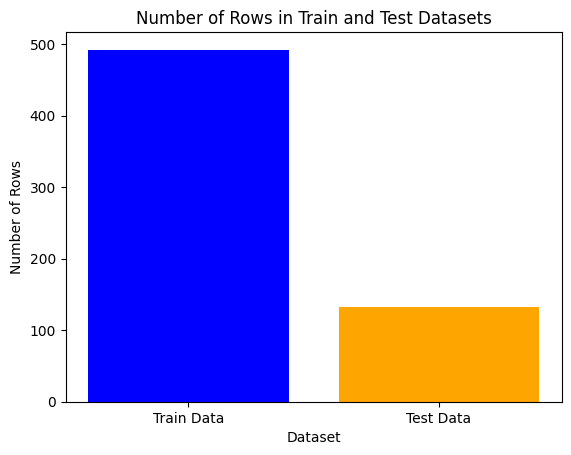

In [11]:
import matplotlib.pyplot as plt

# Count the number of rows in each DataFrame
train_count = trainData.count()
test_count = testData.count()

# Data for plotting
datasets = ['Train Data', 'Test Data']
counts = [train_count, test_count]

# Create and show the plot
plt.bar(datasets, counts, color=['blue', 'orange'])
plt.title('Number of Rows in Train and Test Datasets')
plt.ylabel('Number of Rows')
plt.xlabel('Dataset')
plt.show()

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


### 1. Build a Logistic Regression Model with Pipeline and train it on the Train dataset.
### 2. Run the model on the Test dataset.
### 3. Evaluate the model for accuracy, precision, recall, and F1 Score
### 4. Print the evaluation results

In [14]:
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

# Create a Logistic Regression Classifier
lr = LogisticRegression(labelCol="OUTCOME", featuresCol="assembled_features", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Build the Pipeline
pipeline = Pipeline(stages=[lr])

# Fit the model
model = pipeline.fit(trainData)

# Make predictions
predictions = model.transform(testData)

# Initialize evaluators for accuracy, weighted precision, weighted recall, and F1 score
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="accuracy")
precision_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="f1")

# Evaluate the model
accuracy = accuracy_evaluator.evaluate(predictions)
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1_score = f1_evaluator.evaluate(predictions)

# Print the metrics
print(f"Test Accuracy = {accuracy}")
print(f"Test Weighted Precision = {precision}")
print(f"Test Weighted Recall = {recall}")
print(f"Test F1 Score = {f1_score}")

Test Accuracy = 0.6484375
Test Weighted Precision = 0.7226055194805194
Test Weighted Recall = 0.6484375
Test F1 Score = 0.5538134752710923


### 1. Build a Random Forest Model with Pipeline and train it on the Train dataset. Chose to keep the number of trees, max depth, and bins low in an attempt to reduce overfitting upfront.
### 2. Run the model on the Test dataset.
### 3. Evaluate the model for accuracy, precision, recall, and F1 Score
### 4. Print the evaluation results

In [15]:
from pyspark.ml.classification import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(labelCol="OUTCOME", featuresCol="assembled_features", numTrees=3, maxDepth=3, maxBins=3)

# Build the Pipeline
pipeline = Pipeline(stages=[rf])

# Fit the model
model = pipeline.fit(trainData)

# Make predictions
predictions = model.transform(testData)

# Initialize evaluators for accuracy, weighted precision, weighted recall, and F1 score
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="accuracy")
precision_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="OUTCOME", predictionCol="prediction", metricName="f1")

# Evaluate the model
accuracy = accuracy_evaluator.evaluate(predictions)
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1_score = f1_evaluator.evaluate(predictions)

# Print the metrics
print(f"Test Accuracy = {accuracy}")
print(f"Test Weighted Precision = {precision}")
print(f"Test Weighted Recall = {recall}")
print(f"Test F1 Score = {f1_score}")

Test Accuracy = 0.921875
Test Weighted Precision = 0.9307528409090909
Test Weighted Recall = 0.921875
Test F1 Score = 0.9198878848728247


### Close the Spark Session

In [ ]:
# Stop the SparkSession
spark.stop()